 # Importing the Required Libraries

In [46]:
#Importing the correct functions/libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report



# Loading the Dataset

In [33]:
encodings_to_try = ['utf-8', 'latin1', 'utf-16']
for encoding in encodings_to_try:
    try:
        transaction_data = pd.read_csv('fraudTrain.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        continue
else:
    # Handle the case when none of the encodings work
    print("Unable to read the CSV file with the specified encodings")

transaction_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


# Visualizing the Data

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

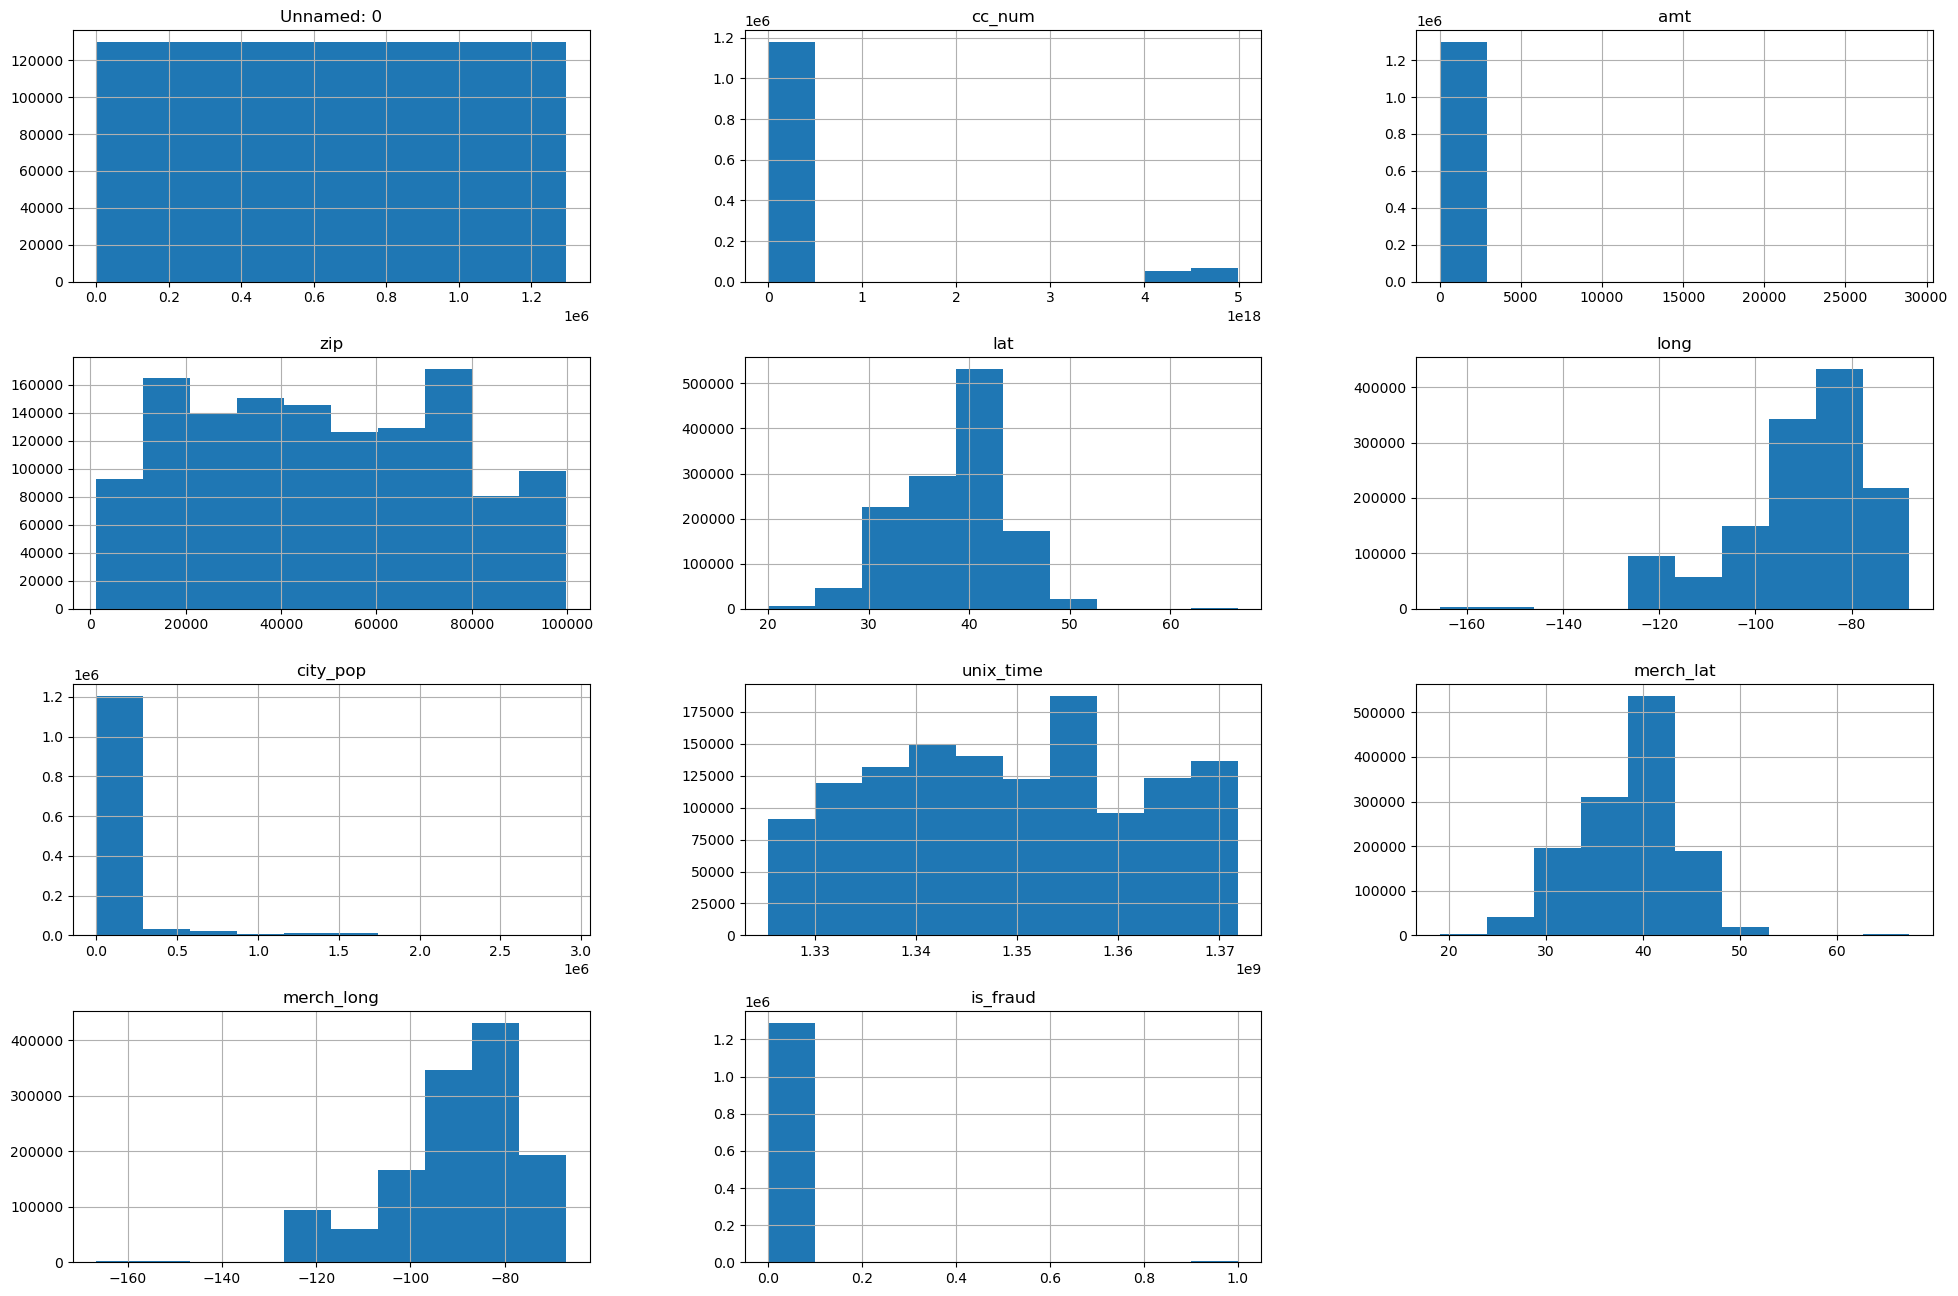

In [34]:
transaction_data.hist(figsize=(24, 16))

# Dropping Unneccesary Features

In [35]:
print(transaction_data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [36]:
columns_to_drop = ['dob', 'street', 'zip', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
transaction_data= transaction_data.drop(columns=columns_to_drop)
transaction_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,city,state,job,trans_num,unix_time,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,0


In [37]:
transaction_data.shape

(1296675, 14)

In [38]:
transaction_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
city                     0
state                    0
job                      0
trans_num                0
unix_time                0
is_fraud                 0
dtype: int64

# Splitting the Data for Training

In [39]:
categorical_columns = transaction_data.select_dtypes(exclude='number').columns.tolist()

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
ct = ColumnTransformer(
    [('one_hot_encoder', encoder, categorical_columns)],
    remainder='passthrough'
)

# Fit and transform the data
X_encoded = ct.fit_transform(transaction_data)

# Assuming the target variable is 'is_fraud' and it's already binary
y = transaction_data['is_fraud']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1037340, 2574450) (1037340,) (259335, 2574450) (259335,)


# Training Logistic Regression Model

In [ ]:
#Initializing the model and training the data 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [42]:
# Predict on the test set
predictions = log_reg.predict(X_test)

# Calculating our accuracy of the Model

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.9941388551487458
Confusion Matrix:
[[257815      0]
 [  1520      0]]
Classification Report:


C:\Users\user\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



C:\Users\user\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Fine-Tuning Our Model

## Method 1: Feature Engineering/Selection


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training data and labels

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Initialize RFE with the logistic regression model and number of features to select
rfe = RFE(logistic_model, n_features_to_select=5)  # Select top 5 features

# Fit RFE to your data
rfe.fit(X_train, y_train)

# Transform the training data to include only the selected features
X_train_selected = rfe.transform(X_train)

# Transform the test data as well (using the same selected features)
X_test_selected = rfe.transform(X_test)

# Train the model using the selected features
logistic_model.fit(X_train_selected, y_train)


In [ ]:
#Predictions: 
predictions = logistic_model.predict(X_test_selected)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Feature Engineered: {accuracy}")

# Confusion matrix
print("Confusion Matrix Feature Engineered:")
print(confusion_matrix(y_test, predictions))

# Classification report
print("Classification Report Feature Engineered:")
print(classification_report(y_test, predictions))


Accuracy Feature Engineered: 0.953485
Confusion Matrix Feature Engineered:
[[181880    677]
 [  8626   8817]]
Classification Report Feature Engineered:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    182557
         1.0       0.93      0.51      0.65     17443

    accuracy                           0.95    200000
   macro avg       0.94      0.75      0.81    200000
weighted avg       0.95      0.95      0.95    200000



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.969


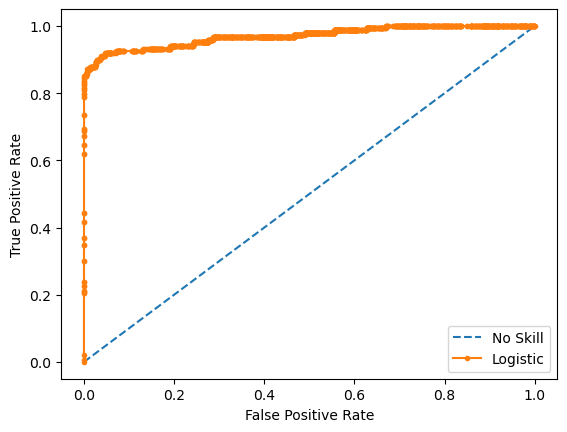

In [19]:
y_pred = logistic_model.predict_proba(X_test_selected)
y_pred = y_pred[:, 1]
# generate a no skill prediction all 0
no_skill_pred = [0 for _ in range(len(y_test))]

no_skill_auc = metrics.roc_auc_score(y_test, no_skill_pred)
logistic_auc = metrics.roc_auc_score(y_test, y_pred)

print('No Skill: ROC AUC=%.3f' % (no_skill_auc))
print('Logistic: ROC AUC=%.3f' % (logistic_auc))

# calculate roc curves
# fpr = false positive rate
# tpr = true positie rate
no_skill_fpr, no_skill_tpr, _ = metrics.roc_curve(y_test, no_skill_pred)
logistic_fpr, logistic_tpr, _ = metrics.roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle = '--', label = 'No Skill')
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Logistic: f1=0.728 auc=0.765


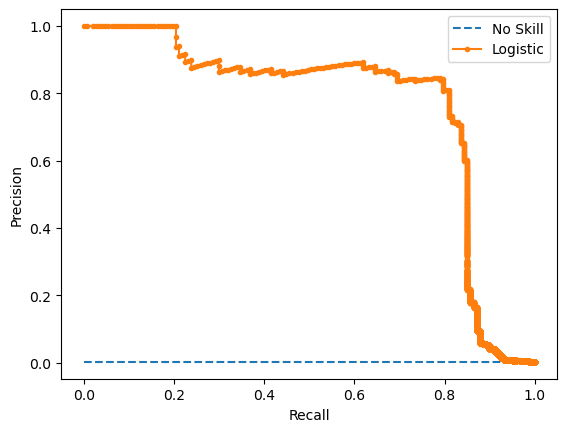

In [20]:
# predict class values
logistic_precision, logistic_recall, _ = metrics.precision_recall_curve(y_test, predictions)
logistic_f1  = metrics.f1_score(y_test, predictions)
logistic_auc = metrics.auc(logistic_recall, logistic_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (logistic_f1, logistic_auc))
# plot the precision-recall curves
# no skill = straight line across bottom
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(logistic_recall, logistic_precision, marker='.', label='Logistic')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()